In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram

In [2]:
def get_data_from_df(df):
    return {row[1]:(row[2:-1], 0, "", "") for row in df.to_numpy()}

In [3]:
nearest_neighbour = lambda x: min(x)

farest_neighbour = lambda x: max(x)

ward_method = lambda x: sum(x**2)

In [4]:
euclidean_distance = lambda x, y : (x - y)**2
city_block_distance = lambda x,  y : np.abs(x - y)

In [9]:
def hierarchical_tree(data, dist_chooser, dist_calc = euclidean_distance):

    all_keys = {key:key_ind for key_ind, key in enumerate(data.keys())}
    ret = []
    ind = 0

    layer_clusters = data.copy()
    while len(layer_clusters) > 1:
        
        dist_matrix = np.zeros([len(layer_clusters), len(layer_clusters)]) + np.inf
        key_list = list(layer_clusters.keys())
        for key_index in range(len(key_list)):
            for i in range(key_index):
                dist_matrix[key_index][i] = dist_chooser(dist_calc(layer_clusters[key_list[key_index]][0], layer_clusters[key_list[i]][0]))

        min_val = dist_matrix.min()
        new_cluster_ind = np.argmin(dist_matrix)

        new_cluster_par1 = key_list[new_cluster_ind//len(key_list)]
        new_cluster_par2 = key_list[new_cluster_ind%len(key_list)]

        new_cluster_value = (
            np.mean([layer_clusters[new_cluster_par2][0],layer_clusters[new_cluster_par1][0]], axis = 0),
            min_val + max(layer_clusters[new_cluster_par1][1], layer_clusters[new_cluster_par2][1]),
            new_cluster_par1,
            new_cluster_par2
        )

        layer_clusters.pop(new_cluster_par1)
        layer_clusters.pop(new_cluster_par2)

        new_clust_name = f"cluster{ind}"
        all_keys[new_clust_name] = len(all_keys)

        layer_clusters[new_clust_name] = new_cluster_value
        ret += [[new_clust_name, new_cluster_value]]
        ind += 1

    return  all_keys, ret

def generate_links(keys, clusters):
    return np.array([[keys[cl[1][2]], keys[cl[1][3]], np.cbrt(cl[1][1]), keys[cl[0]]] for cl_ind, cl in enumerate(clusters)], dtype=float)

На вохд поступает словарь стран где каждая запись имеет вид:

Ключ: Параметры, растояние между родительскими кластероами, имя первого кластера, имя второго кластера

$\quad$

Далее на каждом шаге итерации строится матрица вида

$$\begin{vmatrix}
\infty & \infty & \infty & 	\vdots & \infty \\
d_{1, 0} & \infty & \infty & 	\vdots & \infty \\
d_{2, 0} & d_{2, 1} & \infty & 	\vdots & \infty \\
\cdots & \cdots & \cdots & 	\ddots & \cdots \\
d_{n, 0} & d_{n, 1} & d_{n, 2} & 	\vdots & \infty
\end{vmatrix}$$

Где $d_{i,j}$ растояние между кластерами i и j соответсвтенно

$\quad$

Далее находится минимальное $d_{i,j}$, после чего кластеры i и j объединяются в кластер  k

На выходе получаем словарь_кластеров, новые кластеры

Словарь класетров необходим для перевода строки имени кластера в индексы

In [ ]:
df = pd.read_csv("data_lab_1.csv", delimiter=";", decimal=",")
df = df[df["num"]!=5]
data = get_data_from_df(df)

In [ ]:
df

,num,country,X1,X2,X3,X4
0,1,Россия,44.5,84.98,20.4,3.2
1,2,Австралия,32.5,30.58,71.4,8.5
2,3,Австрия,33.9,38.42,78.7,9.2
3,4,Азербайджан,38.8,60.34,12.1,3.3
5,6,Беларусь,43.6,60.79,20.4,5.4
6,7,Бельгия,41.0,29.82,79.7,8.3
7,8,Болгария,36.4,70.57,17.3,5.4
8,9,Великобритания,17.9,34.51,69.7,7.1
9,10,Венгрия,32.1,64.73,24.5,6.0
10,11,Германия,38.1,36.63,76.2,8.6


In [ ]:
df_normolized = df.copy()
features = df.columns[2:]

# Std norm
df_normolized[features] = (df_normolized[features] - df_normolized[features].mean())/df_normolized[features].std()

data_norm = get_data_from_df(df_normolized)

In [ ]:
data

{'Россия': (array([44.5, 84.98, 20.4], dtype=object), 0, '', ''),
 'Австралия': (array([32.5, 30.58, 71.4], dtype=object), 0, '', ''),
 'Австрия': (array([33.9, 38.42, 78.7], dtype=object), 0, '', ''),
 'Азербайджан': (array([38.8, 60.34, 12.1], dtype=object), 0, '', ''),
 'Беларусь': (array([43.6, 60.79, 20.4], dtype=object), 0, '', ''),
 'Бельгия': (array([41.0, 29.82, 79.7], dtype=object), 0, '', ''),
 'Болгария': (array([36.4, 70.57, 17.3], dtype=object), 0, '', ''),
 'Великобритания': (array([17.9, 34.51, 69.7], dtype=object), 0, '', ''),
 'Венгрия': (array([32.1, 64.73, 24.5], dtype=object), 0, '', ''),
 'Германия': (array([38.1, 36.63, 76.2], dtype=object), 0, '', ''),
 'Греция': (array([41.5, 32.84, 44.4], dtype=object), 0, '', ''),
 'Грузия': (array([55.0, 62.64, 11.3], dtype=object), 0, '', ''),
 'Дания': (array([36.7, 34.07, 79.2], dtype=object), 0, '', ''),
 'Ирландия': (array([15.8, 39.27, 57.0], dtype=object), 0, '', ''),
 'Испания': (array([40.9, 28.46, 54.8], dtype=obje

#  Выполненне задач

## Задание 1

    Данные не нормированны

    Растояние между кластерами - Евклидово расстояние

    Правила объединения или связи - метод ближайшего соседа

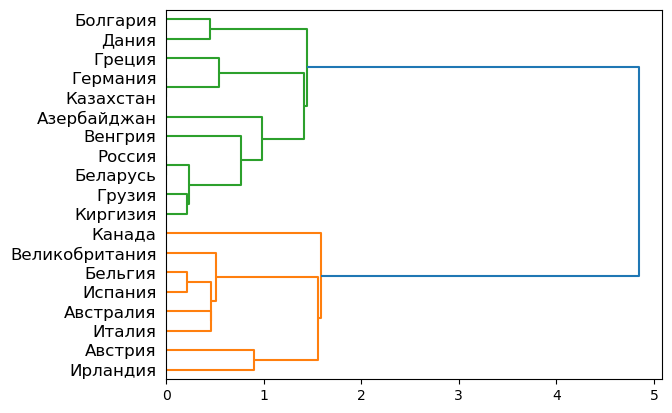

In [10]:
links = generate_links(*hierarchical_tree(data, nearest_neighbour))
dn = dendrogram(links, labels=list(data.keys()),orientation='right')
plt.show()

## Задание 2

    Данные нормированны

    Растояние между кластерами - Евклидово расстояние

    Правила объединения или связи - метод ближайшего соседа

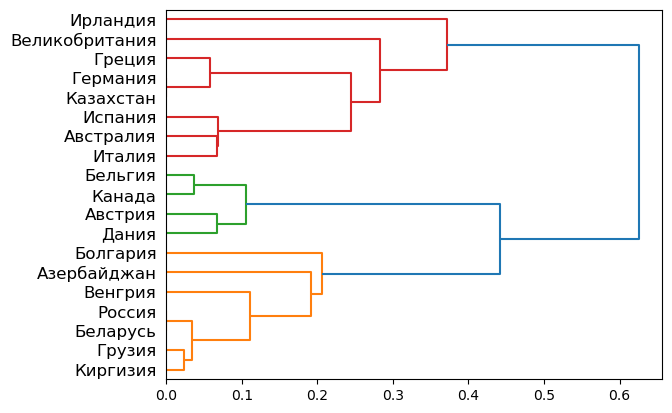

In [11]:
links = generate_links(*hierarchical_tree(data_norm, nearest_neighbour))
dn = dendrogram(links, labels=list(data_norm.keys()),orientation='right')
plt.show()

## Задание 3

    Данные не нормированны

    Растояние между кластерами - Евклидово расстояние

    Правила объединения или связи - метод наиболее удаленных соседей

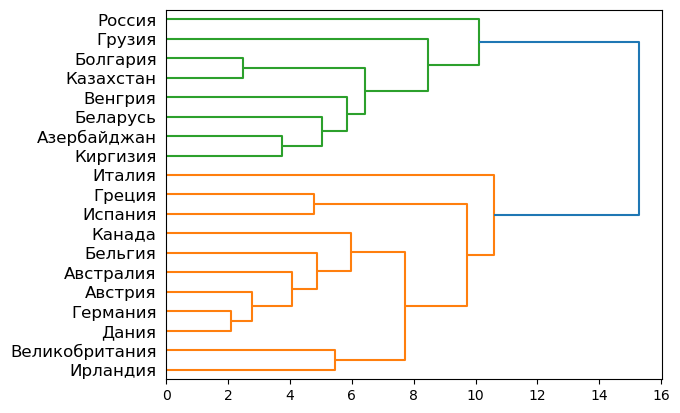

In [12]:
links = generate_links(*hierarchical_tree(data, farest_neighbour))
dn = dendrogram(links, labels=list(data.keys()),orientation='right')
plt.show()

## Задание 4

    Данные не нормированны

    Растояние между кластерами - Расстояние городских кварталов

    Правила объединения или связи - Метод Варда

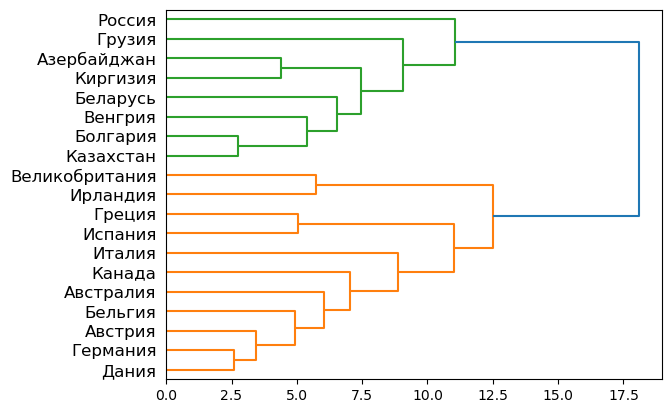

In [13]:
links = generate_links(*hierarchical_tree(data, ward_method, city_block_distance))
dn = dendrogram(links, labels=list(data.keys()),orientation='right')
plt.show()

In [14]:
df = pd.read_csv("data_lab1_task6.csv", delimiter=";", decimal=",")
df = df[df["num"]!=5]
data = get_data_from_df(df)

In [15]:
df

,num,country,X1,X2,X3,X4,X5,X6
0,1,Россия,55,3.9,30.0,5.00,28,124
1,2,Австралия,100,2.6,47.0,8.20,121,87
2,3,Австрия,93,5.3,37.0,12.00,146,74
3,4,Азербайджан,20,4.1,12.4,7.90,52,141
5,6,Беларусь,72,3.6,28.0,5.40,38,120
6,7,Бельгия,85,6.9,48.0,11.00,83,72
7,8,Болгария,65,3.0,18.0,9.50,92,156
8,9,Великобритания,67,3.5,39.0,8.80,91,91
9,10,Венгрия,73,1.7,40.0,10.90,73,106
10,11,Германия,88,6.8,35.0,8.10,138,73


In [16]:
df_normolized = df.copy()
features = df.columns[2:]

# Std  norm
df_normolized[features] = (df_normolized[features] - df_normolized[features].mean())/df_normolized[features].std()

data_norm = get_data_from_df(df_normolized)

In [17]:
data

{'Россия': (array([55, 3.9, 30.0, 5.0, 28], dtype=object), 0, '', ''),
 'Австралия': (array([100, 2.6, 47.0, 8.2, 121], dtype=object), 0, '', ''),
 'Австрия': (array([93, 5.3, 37.0, 12.0, 146], dtype=object), 0, '', ''),
 'Азербайджан': (array([20, 4.1, 12.4, 7.9, 52], dtype=object), 0, '', ''),
 'Беларусь': (array([72, 3.6, 28.0, 5.4, 38], dtype=object), 0, '', ''),
 'Бельгия': (array([85, 6.9, 48.0, 11.0, 83], dtype=object), 0, '', ''),
 'Болгария': (array([65, 3.0, 18.0, 9.5, 92], dtype=object), 0, '', ''),
 'Великобритания': (array([67, 3.5, 39.0, 8.8, 91], dtype=object), 0, '', ''),
 'Венгрия': (array([73, 1.7, 40.0, 10.9, 73], dtype=object), 0, '', ''),
 'Германия': (array([88, 6.8, 35.0, 8.1, 138], dtype=object), 0, '', ''),
 'Греция': (array([83, 1.0, 24.0, 8.8, 99], dtype=object), 0, '', ''),
 'Грузия': (array([21, 3.8, 36.0, 9.8, 55], dtype=object), 0, '', ''),
 'Дания': (array([98, 5.0, 38.0, 10.3, 89], dtype=object), 0, '', ''),
 'Ирландия': (array([99, 3.3, 31.0, 9.6, 87],

## Задание 6

    Данные не нормированны

    Растояние между кластерами - Евклидово расстояние

    Правила объединения или связи - метод ближайшего соседа

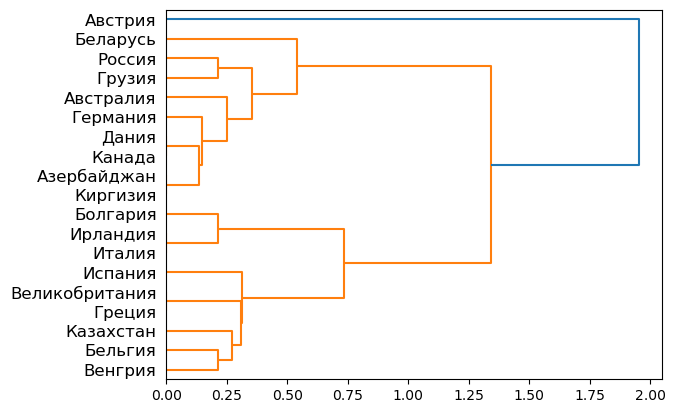

In [18]:
links = generate_links(*hierarchical_tree(data, nearest_neighbour))
dn = dendrogram(links, labels=list(data.keys()),orientation='right')
plt.show()

## Задание 7

    Данные нормированны

    Растояние между кластерами - Евклидово расстояние

    Правила объединения или связи - метод ближайшего соседа

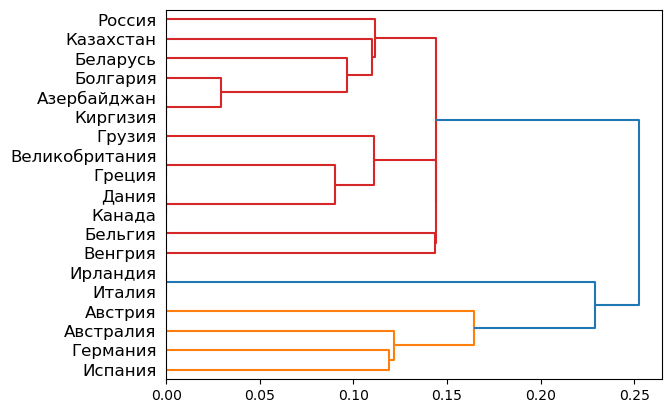

In [19]:
links = generate_links(*hierarchical_tree(data_norm, nearest_neighbour))
dn = dendrogram(links, labels=list(data_norm.keys()),orientation='right')
plt.show()

## Задание 8

    Данные не нормированны

    Растояние между кластерами - Евклидово расстояние

    Правила объединения или связи - метод наиболее удаленных соседей

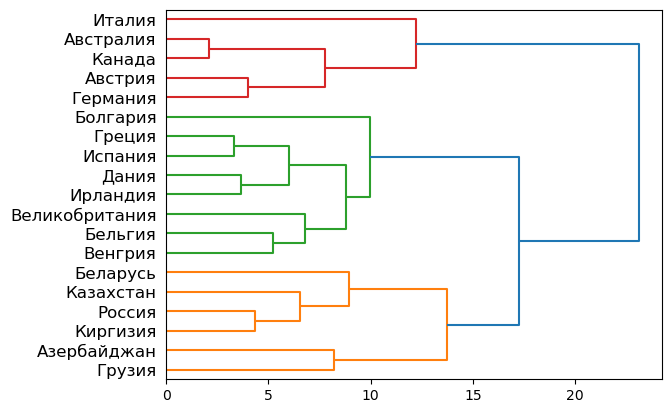

In [20]:
links = generate_links(*hierarchical_tree(data, farest_neighbour))
dn = dendrogram(links, labels=list(data.keys()),orientation='right')
plt.show()

## Задание 9

    Данные не нормированны

    Растояние между кластерами - Расстояние городских кварталов

    Правила объединения или связи - Метод Варда

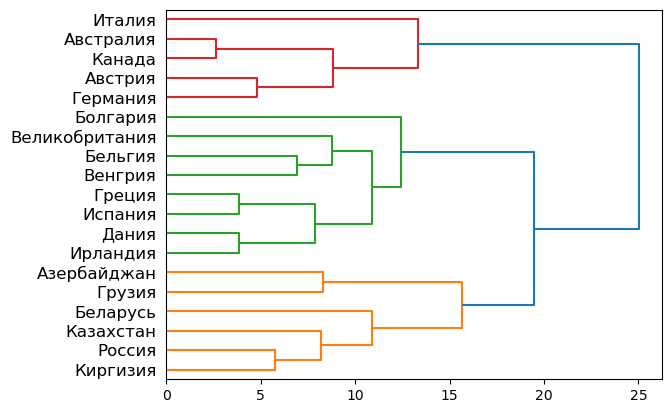

In [21]:
links = generate_links(*hierarchical_tree(data, ward_method, city_block_distance))
dn = dendrogram(links, labels=list(data.keys()),orientation='right')
plt.show()